<h3> Sergio Andres Rios Gomez</h3>
<h4> Implementación con biblioteca </h4>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

<p> Cargar los datos </p>
<p> Keras tiene el dataset MNIST predescargable. Esta línea ya lo divide en entrenamiento y prueba. </p>

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<p> Preprocesamiento </p>
<p> Normalizamos los pixeles y codificamos las clases de 0-9 en vectores one-hot para poder usarlos en la red.</p>

In [4]:
# Normalizar imágenes (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding para las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

<p> Crear el modelo. Este modelo tiene: </p>
<li> Una capa que aplana la imagen </li>
<li> Una capa oculta con ReLU</li>
<li> Una capa de salida con softmax </li>

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Aplanar imagen 28x28 → vector de 784
    Dense(128, activation='relu'),         # Capa oculta con 128 neuronas
    Dense(10, activation='softmax')        # Capa de salida con 10 clases
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<p> Compilar el modelo </p>
<p> Definimos: </p>
<li> Adam como optimizador </li>
<li> Categorical crossentropy como función de pérdida </li>
<li> Métrica de accuracy para evaluar el rendimiento </li>

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<p> Entrenar el modelo</p>
<p> Entrenamos por 20 epochs y evaluamos con los datos de prueba en cada uno.</p>

In [7]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    validation_data=(X_test, y_test_cat)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8765 - loss: 0.4279 - val_accuracy: 0.9566 - val_loss: 0.1495
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9645 - loss: 0.1209 - val_accuracy: 0.9673 - val_loss: 0.1077
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9751 - loss: 0.0826 - val_accuracy: 0.9712 - val_loss: 0.0972
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0604 - val_accuracy: 0.9752 - val_loss: 0.0792
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9757 - val_loss: 0.0798
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9778 - val_loss: 0.0769
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0264 - val_accuracy: 0.9776 - val_loss: 0.0796
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9933 - loss: 0.0222 

<p> Visualizar resultados </p>
<p> Esto te muestra cómo evoluciona la precisión y la pérdida durante el entrenamiento y validación. </p>

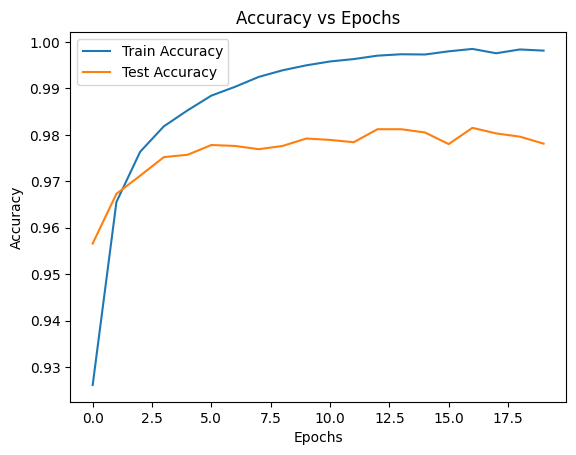

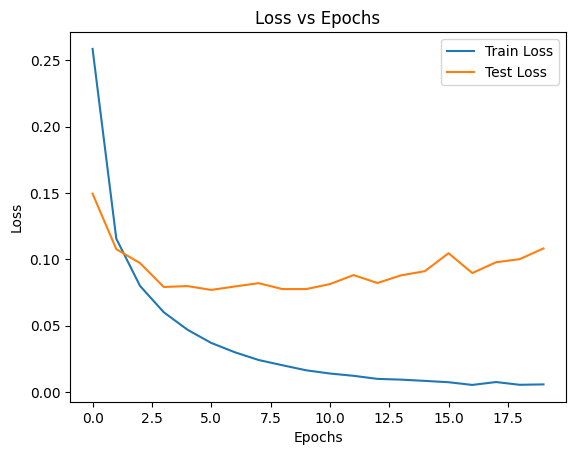

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<p> Realizar el ejercicio manualmente fue clave para comprender el funcionamiento interno de una red neuronal, mientras que usar bibliotecas como TensorFlow facilita la implementación de modelos más complejos y eficientes. En el proceso de formación, ambos enfoques son complementarios:</p>
<li> El primero nos da fundamentos sólidos.</li>
<li> El segundo nos da las herramientas para construir sistemas reales de manera productiva..</li>
<li> El modelo alcanza una precisión superior al 99% en entrenamiento y cerca del 98% en prueba, lo que indica que el modelo ha aprendido muy bien a clasificar los dígitos del conjunto MNIST.</li>
